<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/main/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Data Loading

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [59]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [60]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [61]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))
df[cat_cols] = df[cat_cols].fillna('Unknown')

print(df.isnull().sum())

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

In [62]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [63]:
df['Total Expenditure'] = df[['Total Food Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Essential Expenditure'] = df[['Total Food Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Communication Expenditure', 'Education Expenditure']].sum(axis=1)

df['Non-Essential Expenditure'] = df[['Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']].sum(axis=1)

df['Total Income'] = df['Total Household Income'] + df['Total Income from Entrepreneurial Acitivites']

df['Savings'] = df['Total Income'] - df['Total Expenditure']


In [64]:
# from sklearn.ensemble import IsolationForest

# iso = IsolationForest(contamination=0.05, random_state=42)  
# outlier_preds = iso.fit_predict(df[num_cols])

# df['Outlier'] = outlier_preds  
# print(df['Outlier'].value_counts())

In [65]:
Q1 = df['Total Income'].quantile(0.25)
Q3 = df['Total Income'].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

# Remove rows where 'Total Income' is an outlier
df_iqr_filtered = df[(df['Total Income'] >= lower_bound) & (df['Total Income'] <= upper_bound)]

print("Original shape:", df.shape)
print("After removing outliers (IQR):", df_iqr_filtered.shape)

Original shape: (41544, 65)
After removing outliers (IQR): (40279, 65)


In [66]:
# df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])

# print(f"Original dataset size: {df.shape}")
# print(f"New dataset size after removing outliers: {df_cleaned.shape}")

# Data Preprocessing

In [67]:
from sklearn.preprocessing import PowerTransformer

scaler = StandardScaler()
num_cols = df_iqr_filtered.select_dtypes(include=['number']).columns
df_scaled = scaler.fit_transform(df_iqr_filtered[num_cols])

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(df_scaled)
df_iqr_filtered[num_cols] = df_transformed

/var/folders/nn/36lhgshn7tq43kb5n5y3qkfm0000gn/T/ipykernel_3485/495176577.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered[num_cols] = df_transformed


In [68]:
encoder = LabelEncoder()
label_cols = ['Household Head Sex', 'Household Head Marital Status', 'Household Head Job or Business Indicator']
for col in label_cols:
    df_iqr_filtered[col] = encoder.fit_transform(df_iqr_filtered[col])

onehot = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
cat_cols = df_iqr_filtered.select_dtypes(include=['object']).columns
encoded_cols = onehot.fit_transform(df_iqr_filtered[cat_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=onehot.get_feature_names_out(cat_cols))

df_iqr_filtered = df_iqr_filtered.drop(columns=list(cat_cols)).reset_index(drop=True)
df_iqr_filtered = pd.concat([df_iqr_filtered, encoded_df], axis=1)

/var/folders/nn/36lhgshn7tq43kb5n5y3qkfm0000gn/T/ipykernel_3485/2122224780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered[col] = encoder.fit_transform(df_iqr_filtered[col])
/var/folders/nn/36lhgshn7tq43kb5n5y3qkfm0000gn/T/ipykernel_3485/2122224780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_filtered[col] = encoder.fit_transform(df_iqr_filtered[col])
/var/folders/nn/36lhgshn7tq43kb5n5y3qkfm0000gn/T/ipykernel_3485/2122224780.py:4: SettingWithCopyWarning: 
A value is trying 

In [69]:
# corr_matrix = df_iqr_filtered.corr().abs()
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# df_iqr_filtered = df_iqr_filtered.drop(columns=high_corr_features)

In [70]:
# from sklearn.decomposition import PCA

# def best_num_components(data, variance_threshold=0.95):
#     pca = PCA()
#     pca.fit(data)
#     cumulative_variance = pca.explained_variance_ratio_.cumsum()
#     num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
#     return num_components, cumulative_variance, pca.explained_variance_ratio_

# num_components, cumulative_variance, explained_variance = best_num_components(df_iqr_filtered)
# print(f"Number of components to keep 95% variance: {num_components}")


In [71]:
import umap
import umap.umap_ as umap

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
X_umap = umap_reducer.fit_transform(df_iqr_filtered)

/Users/yscalify/.pyenv/versions/3.13.0/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [72]:
# num_components, cumulative_variance, explained_variance = best_num_components(df_iqr_filtered)
# print(f"Number of components to keep 90% variance: {num_components}")

# pca = PCA(n_components=num_components)
# X_pca = pca.fit_transform(df_iqr_filtered)

# plt.figure(figsize=(10, 5))
# plt.bar(range(1, num_components + 1), explained_variance[:num_components], alpha=0.7, color='blue')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance of Each Component')
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
# plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Threshold")
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance vs Number of Components')
# plt.grid(True)
# plt.legend()
# plt.show()

# Clustering Models

### K-Means Clustering

For K = 2, WCSS = 671854.44, Silhouette Score = 0.6123
For K = 3, WCSS = 382361.50, Silhouette Score = 0.6615
For K = 4, WCSS = 255760.56, Silhouette Score = 0.4355
For K = 5, WCSS = 189606.92, Silhouette Score = 0.4593
For K = 6, WCSS = 136745.27, Silhouette Score = 0.4763
For K = 7, WCSS = 109440.53, Silhouette Score = 0.4897
For K = 8, WCSS = 82875.41, Silhouette Score = 0.4745
For K = 9, WCSS = 59657.21, Silhouette Score = 0.5128
For K = 10, WCSS = 49884.40, Silhouette Score = 0.5130


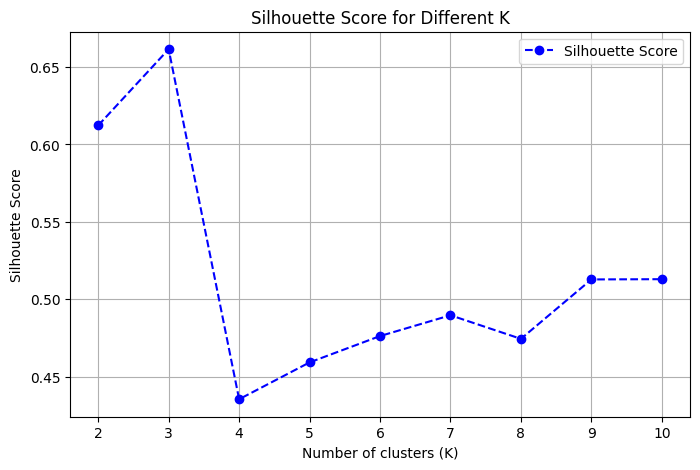

In [73]:
from sklearn.cluster import KMeans

wcss = []
silhouette_scores = []
sse = {}

k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    
    wcss.append(kmeans.inertia_)
    sse[k] = kmeans.inertia_
    
    score = silhouette_score(X_umap, labels, metric='euclidean')
    silhouette_scores.append(score)
    
    print(f"For K = {k}, WCSS = {sse[k]:.2f}, Silhouette Score = {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b', label="Silhouette Score")
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

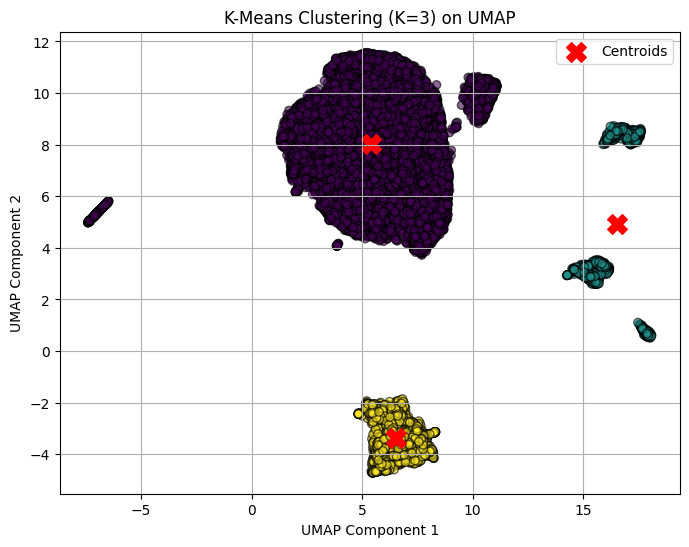

In [74]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_umap)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', label='Centroids', marker='X')
plt.title(f'K-Means Clustering (K={optimal_k}) on UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.grid(True)
plt.show()

df_iqr_filtered['Cluster'] = labels

In [75]:
cluster_summary = df_iqr_filtered.groupby('Cluster').agg(['mean', 'median', 'std'])
print(cluster_summary)

        Total Household Income                     Total Food Expenditure  \
                          mean    median       std                   mean   
Cluster                                                                     
0                     0.005268 -0.053986  0.924133               0.009017   
1                     1.319320  1.458900  0.669186               0.974527   
2                    -0.942873 -0.982807  0.637835              -0.735398   

                            Agricultural Household indicator            \
           median       std                             mean    median   
Cluster                                                                  
0        0.014957  0.954856                        -0.060878 -0.689821   
1        1.053866  0.852797                        -0.137647 -0.689821   
2       -0.743213  0.816228                         0.556655  1.335067   

                  Bread and Cereals Expenditure  ...  \
              std                   

In [76]:
df_iqr_filtered.head()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc",Cluster
0,1.516001,0.981201,-0.689821,1.354948,1.647165,1.492982,1.118453,0.893827,2.048112,-0.733414,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.282630,-0.119035,-0.689821,-0.568617,-0.376401,1.095888,0.450119,0.186233,1.106502,-0.839493,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.085631,-0.315172,1.335067,0.892869,1.270207,0.076311,-1.566603,-0.057985,-0.192923,-0.492405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,-0.725056,0.178571,-0.689821,0.883153,1.048709,0.519572,0.410133,-1.161743,1.118400,-0.246368,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.204539,0.561359,-0.689821,0.933229,1.150818,1.158549,0.485267,-0.366480,1.735384,-0.230287,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


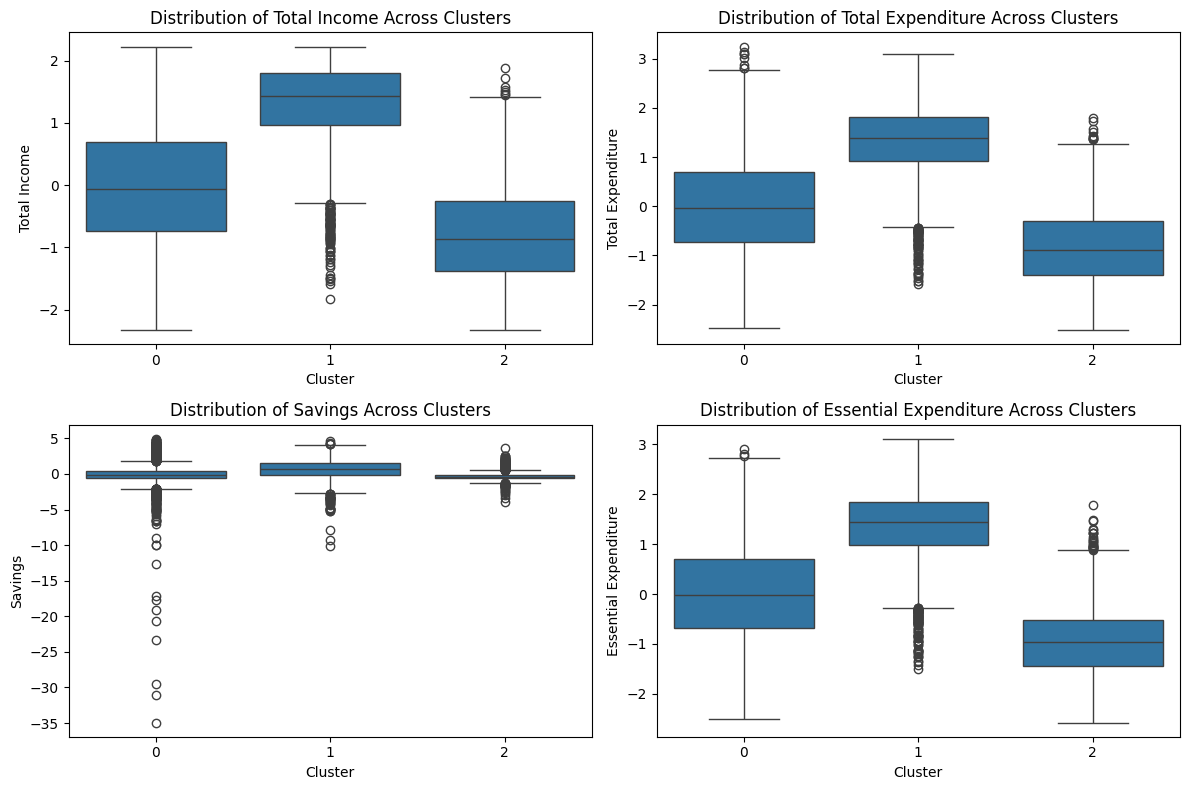

In [83]:
features = ['Total Income', 'Total Expenditure', 'Savings', 'Essential Expenditure']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df_iqr_filtered)
    plt.title(f'Distribution of {feature} Across Clusters')

plt.tight_layout()
plt.show()

In [78]:
from sklearn.cluster import DBSCAN

def find_best_dbscan_params(X, radius_range, min_samples_range):

    best_score = -1
    best_params = {}

    for radius in radius_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=radius, min_samples=min_samples)
            try:
                labels = dbscan.fit_predict(X)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters >= 2:
                    score = silhouette_score(X, labels)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "radius": radius,
                            "min_samples": min_samples,
                            "silhouette_score": score,
                            "n_clusters": n_clusters
                        }
            except ValueError as e:
                print(f"Error with radius={radius}, min_samples={min_samples}: {e}")

    return best_params

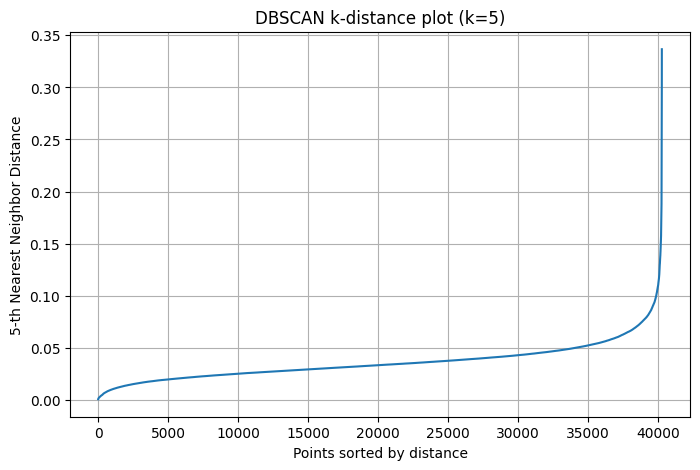

Suggested eps for DBSCAN: 0.0563


In [79]:
from sklearn.neighbors import NearestNeighbors

def find_optimal_eps(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    k_distances = np.sort(distances[:, k-1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{k}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (k={k})")
    plt.grid(True)
    plt.show()

    return k_distances[int(len(k_distances) * 0.9)]  

optimal_eps = find_optimal_eps(X_umap, k=5)
print(f"Suggested eps for DBSCAN: {optimal_eps:.4f}")

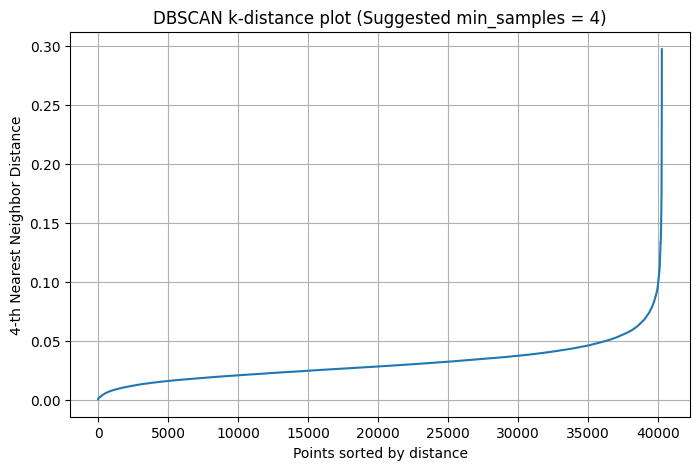

Suggested min_samples for DBSCAN: 4


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def find_best_min_samples(data):

    n_features = data.shape[1]
    suggested_min_samples = max(2, int(2 * n_features))  
    
    neigh = NearestNeighbors(n_neighbors=suggested_min_samples)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)

    k_distances = np.sort(distances[:, suggested_min_samples - 1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{suggested_min_samples}-th Nearest Neighbor Distance")
    plt.title(f"DBSCAN k-distance plot (Suggested min_samples = {suggested_min_samples})")
    plt.grid(True)
    plt.show()

    return suggested_min_samples

optimal_min_samples = find_best_min_samples(X_umap)
print(f"Suggested min_samples for DBSCAN: {optimal_min_samples}")

In [81]:
# radius_range = np.linspace(0.2, 0.3, 10)
# min_samples_range = range(2, 17)

# best_params = find_best_dbscan_params(X_pca, radius_range, min_samples_range)
# print(best_params)

In [82]:
db = DBSCAN(eps = optimal_eps, min_samples = optimal_min_samples)
model = db.fit(X_umap)
labels = db.labels_

print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print(f"Silhouette Score: {silhouette_score(X_umap, labels):.4f}")

Number of clusters: 200
Silhouette Score: -0.5560
